## Importing packages and data

In [ ]:
!pip install xgboost -U -q #Machine learning packages - Checking for previous versions, drops it and installs the newest
!pip install sklearn -U -q #Machine learning packages - Checking for previous versions, drops it and installs the newest

!pip install pydeck -q #Interactive data visualization - 'q' means quiet (to control the console log level).
!pip install folium #Geoplotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd #Data analysis and processing tool
import numpy as np #Mathematical functions
import seaborn as sns #Seaborn plots
from matplotlib import pyplot as plt #Plot control
sns.set() #Plot style
import altair as alt #declarative statistical visualization library
from vega_datasets import data #declarative statistical visualization library
%matplotlib inline

#Fancy geoplotting with DeckGL
import pydeck as pdk

from sklearn.preprocessing import LabelEncoder #Predictive data analysis
from imblearn.under_sampling import NearMiss #Class to perform under-sampling
from scipy import stats #Provides more utility functions for optimization, stats and signal processing

In [ ]:
data = pd.read_csv("/content/bank_marketing.csv", delimiter=';') #reading the csv file

## Getting an overview of the data

In [ ]:
# Converting categorical into boolean using get_dummies 
# Getting the predicted values in terms of 0 and 1

Y = (data['y'] == 'yes')*1

In [ ]:
#Getting an overview of the data set/data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
##Getting an overview of the data set/data types

data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [ ]:
data['y'].value_counts() #checking the value 'y' - the value that determines if the marketing campaign worked

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
#Getting an overview of the data set/data types

data.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
41183  cellular   nov         fri       334         1    999         0   
41184  cellular   nov         fri       383         1    999         0   
41185  cellular   nov         fri       189         2    999         0   
41186  cellular   nov         fri       442         1    999         0   
41187  cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no

In [ ]:
#Getting an overview of the data set/data types

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# Dropping y from the original dataset as we have read it seperately

# data.drop('y', axis = 1, inplace = True)

In [ ]:
# First five rows of the dataset after dropping y from the dataset

#print(data.head())

In [ ]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


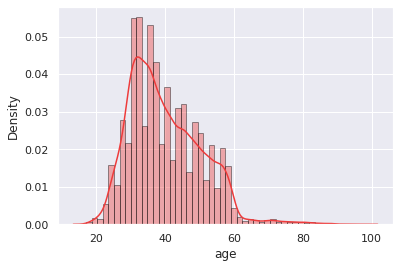

In [ ]:
# Visaulizing how age is distributed in the dataset
# We can see that it is right scewed but has what seems to be a fairly normal distribution from age 18-60 where the outliers is to be found in the age of 61+

sns.distplot(data['age'], hist = True, color = "#EE3B3B", hist_kws = {'edgecolor':'black'})

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


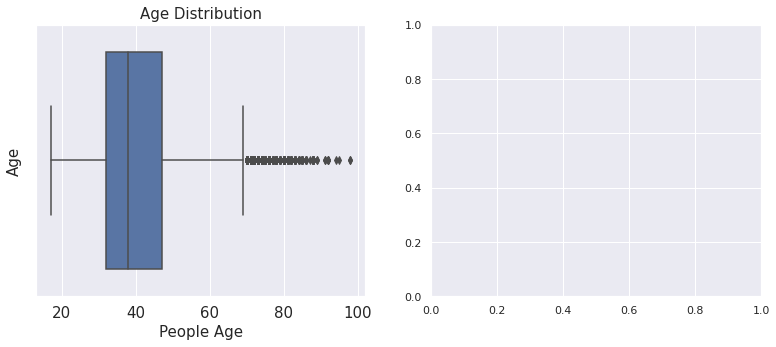

In [ ]:
# A boxplot to visualize the age distribution as well

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

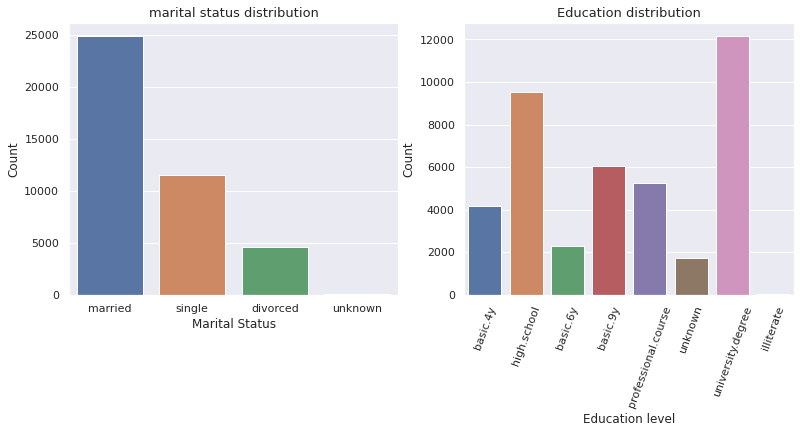

In [ ]:
# Visualizing how Maritial Status and Education is distributed in the dataset.

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# First plot for marital status

sns.countplot(x = "marital", data = data, ax = ax1)
ax1.set_title("marital status distribution", fontsize = 13)
ax1.set_xlabel("Marital Status", fontsize = 12)
ax1.set_ylabel("Count", fontsize = 12)

# Second plot for Education distribution

sns.countplot(x = "education", data = data, ax = ax2)
ax2.set_title("Education distribution", fontsize = 13)
ax2.set_xlabel("Education level", fontsize = 12)
ax2.set_ylabel("Count", fontsize = 12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)

In [ ]:
# We can see that there is a majority of people who are married and when looking at their educational level that high school and university degrees are the most represented

In [ ]:
data.head()

Text(0.5, 1.0, 'Job Count Distribution')

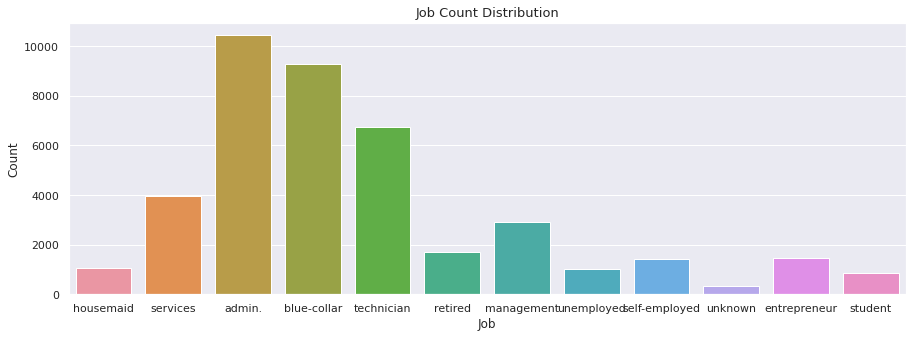

In [ ]:
#Visualizing how Jobs are distribution

fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x = "job", data = data)
ax.set_xlabel('Job', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_title("Job Count Distribution", fontsize = 13)

In [ ]:
#When looking at the job distribution we can see that there are 3 major categories: administrative, blue-collar and technician

Text(0, 0.5, 'Count')

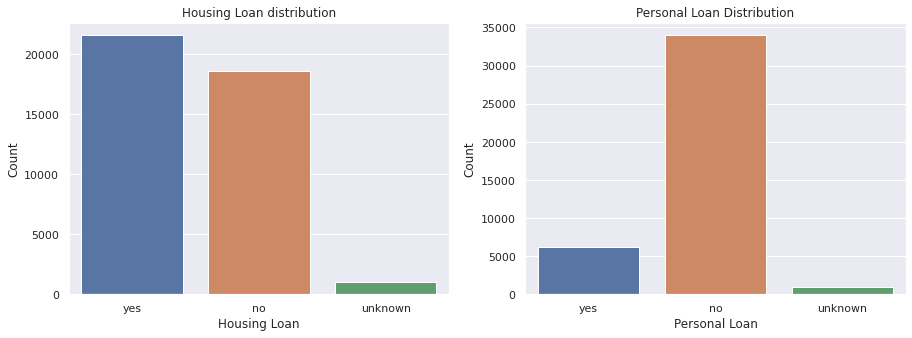

In [ ]:
# Housing loan data distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.countplot(x = "housing", data = data, ax = ax1, order = ['yes', 'no', 'unknown'])
ax1.set_title("Housing Loan distribution")
ax1.set_xlabel("Housing Loan")
ax1.set_ylabel("Count")

# Personal loan data distribution
sns.countplot(x = "loan", data = data, ax = ax2, order = ['yes', 'no', 'unknown'])
ax2.set_title("Personal Loan Distribution")
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Count")

In [ ]:
#Looking at the housing loan distribution we can see that is fairly evened out between having a housing loan or not but there are a few thousands more with housing loans
#Looking at the personal loan distribution we can see that the majority does not have personal loans

In [ ]:
#Getting total count for:

#Credit Defaulters
#People with Housing loan
#People with Personal loan

In [ ]:
#Credit defaulter

print("Number of people with credit default: ", data[data['default'] == 'yes']['default'].count())
print("Number of people with no credit default: ", data[data['default'] == 'no']['default'].count())
print("Number of people who's credit default is unknown: ", data[data['default'] == 'unknown']['default'].count())

Number of people with credit default:  3
Number of people with no credit default:  32588
Number of people who's credit default is unknown:  8597


In [ ]:
#Housing loan

print("Number of people with Housing loan: ", data[data['housing'] == 'yes']['housing'].count())
print("Number of people with no Housing loan: ", data[data['housing'] == 'no']['housing'].count())
print("Number of people who's Housing loan is unknown: ", data[data['housing'] == 'unknown']['housing'].count())

Number of people with Housing loan:  21576
Number of people with no Housing loan:  18622
Number of people who's Housing loan is unknown:  990


In [ ]:
#Personal loan

print("Number of people with Personal loan: ", data[data['loan'] == 'yes']['loan'].count())
print("Number of people with no Personal loan: ", data[data['loan'] == 'no']['loan'].count())
print("Number of people who's Personal loan is unknown: ", data[data['loan'] == 'unknown']['loan'].count())

Number of people with Personal loan:  6248
Number of people with no Personal loan:  33950
Number of people who's Personal loan is unknown:  990


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Call Duration vs Count')

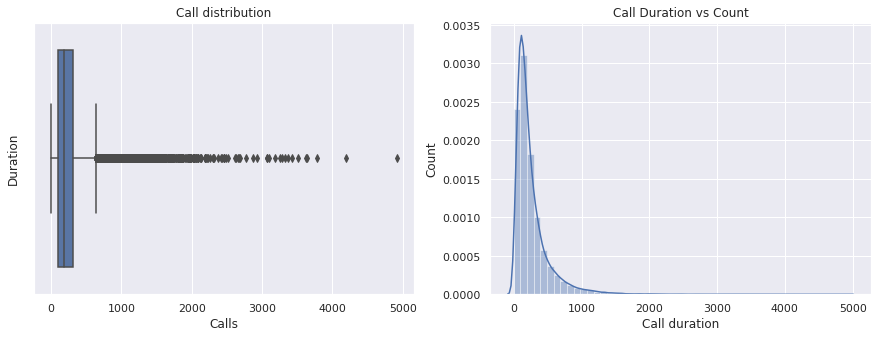

In [ ]:
#Visualisation related to "Last Contact of the Current Campaign"
#Visualisation related to Duration
#Plotting duration using boxplot makes it difficult to obtain some important values like average of distribution
#and so we used a histogram as well to see how its distributed

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxplot(x = "duration", data = data, orient = 'v', ax = ax1)
ax1.set_xlabel("Calls")
ax1.set_ylabel("Duration")
ax1.set_title("Call distribution")

sns.distplot(data['duration'], ax = ax2)
ax2.set_xlabel("Call duration")
ax2.set_ylabel("Count")
ax2.set_title("Call Duration vs Count")

In [ ]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [ ]:
#Different categorial features and their values in the dataset are:

print("Jobs: \n", data["job"].unique(),'\n')
print("Marital Status: \n", data['marital'].unique(),'\n')
print("Education: \n", data['education'].unique(),'\n')
print("Default on Credit: \n", data['default'].unique(),'\n')
print("Housing loan: \n", data['housing'].unique(),'\n')
print("Loan default: \n", data['loan'].unique(),'\n')
print("Contact type: \n", data['contact'].unique(),'\n')
print("Months: \n", data['month'].unique(),'\n')
print("day_of_week: \n", data['day_of_week'].unique(),'\n')
print("Poutcome: \n",data["poutcome"].unique(),'\n')

Jobs: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Marital Status: 
 ['married' 'single' 'divorced' 'unknown'] 

Education: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Default on Credit: 
 ['no' 'unknown' 'yes'] 

Housing loan: 
 ['no' 'yes' 'unknown'] 

Loan default: 
 ['no' 'yes' 'unknown'] 

Contact type: 
 ['telephone' 'cellular'] 

Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week: 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Poutcome: 
 ['nonexistent' 'failure' 'success'] 



In [ ]:
#Creating label encoders to treat all categorical variables
labelencoder_X = LabelEncoder()

In [ ]:
#Creating label encoders to treat all categorical variables
data["job"] = labelencoder_X.fit_transform(data["job"])
data["marital"] = labelencoder_X.fit_transform(data["marital"])
data["education"] = labelencoder_X.fit_transform(data["education"])
data["default"] = labelencoder_X.fit_transform(data["default"])
data["housing"] = labelencoder_X.fit_transform(data["housing"])
data["loan"] = labelencoder_X.fit_transform(data["loan"])
data["contact"] = labelencoder_X.fit_transform(data["contact"])
data["month"] = labelencoder_X.fit_transform(data["month"])
data["day_of_week"] = labelencoder_X.fit_transform(data["day_of_week"])
data["poutcome"] = labelencoder_X.fit_transform(data["poutcome"])

In [ ]:
#Encode target labels with value between 0 and n_classes-1.
data["y"] = labelencoder_X.fit_transform(data["y"])

In [ ]:
# For dataframes to display all the columns in the output
pd.set_option('max_columns', None)
data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   
3            1       151         1    999         0         1           1.1   
4            1       307         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0

In [ ]:
data.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

### Undersampling - not used

In [ ]:
#undersample = NearMiss(version=3)
#undersample

In [ ]:
#data

In [ ]:
#df_x = data.iloc[:,:-1]
#df_y = data['y']

In [ ]:
#df_x.info()

In [ ]:
#df_y = labelencoder_X.fit_transform(df_y)

In [ ]:
#df_y

In [ ]:
#df_x

In [ ]:
#X, y = undersample.fit_resample(df_x, df_y)

In [ ]:
#X['y'] = y
#X.head()

In [ ]:
#X['y'].value_counts()

In [ ]:
#fig, ax = plt.subplots(figsize = (20, 10))
#matrix = np.triu(X.corr())
#sns.heatmap(data.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

## Supervised Machine Learning

In [ ]:
#The iloc function is defined in the Pandas module and helps us to select a specific row or column from the data set
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [ ]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler #Class to perform random over-sampling.

In [ ]:
ros = RandomOverSampler() #Defining the RandomOverSampler

In [ ]:
X_ros, y_ros = ros.fit_resample(X, y) #Fitting the oversample

In [ ]:
X_ros['y'] = y_ros

In [ ]:
X_ros['y'].value_counts() #showing the oversampling - now there are the same variables in each category

0    36548
1    36548
Name: y, dtype: int64

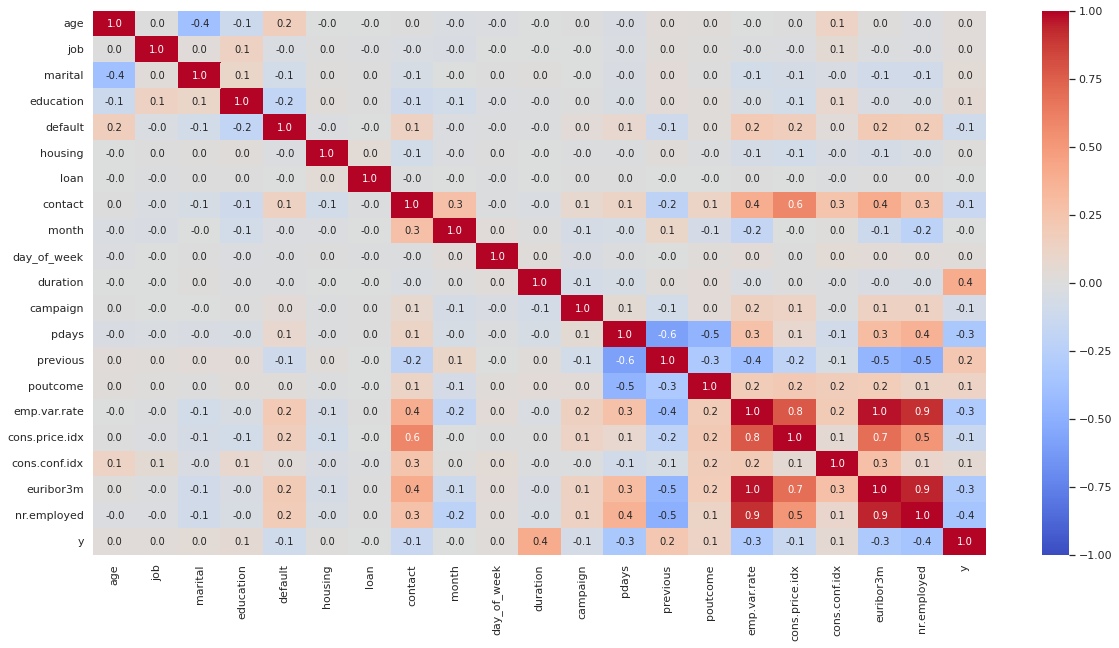

In [ ]:
#Visualizing a correlation plot for all the categories
fig, ax = plt.subplots(figsize = (20, 10))
matrix = np.triu(X.corr())
sns.heatmap(data.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote.

In [ ]:
data_1 = X[["age", "duration", "emp.var.rate", "job", "euribor3m", "nr.employed"]]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5) #making an classifier KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_1, y, random_state=12)

In [ ]:
knn.fit(X_train, y_train) #fit the classifier to the date


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)
#Testing how good the model is:
#.90-1 = excellent (A)
#.80-.90 = good    (B)
#.70-.80 = fair    (C)
#.60-.70 = poor    (D)
#.50-.60 = fail    (F)

0.8998737496358162

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset
#and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=42)


In [ ]:
clf.fit(X_train, y_train) #fitting the data to the model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=2, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix #Compute confusion matrix to evaluate the accuracy of a classification.

In [ ]:
confusion_matrix(y_test, y_pred) #Making the confusion matrix

array([[9100,   16],
       [1123,   58]])

In [ ]:
#9100 = True positive
#16 = False negative
#1123 = False positive
#58 = True negative

In [ ]:
from xgboost import XGBClassifier #XGBClassifier is a scikit-learn API compatible class for classification
from sklearn.metrics import confusion_matrix, accuracy_score #Accuracy classification score.
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation.

In [ ]:
xgb = XGBClassifier() #XGBClassifier is a scikit-learn API compatible class for classification

In [ ]:
xgb.fit(X_train, y_train) #fitting the data

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xgbprd = xgb.predict(X_test)

In [ ]:
#Printing the confusion matrix
print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())


[[8754  362]
 [ 563  618]]
91.0


In [ ]:
##8754 = True positive
#362 = False negative
#563 = False positive
#618 = True negative

#Testing how good the model is:
#.90-1 = excellent (A)
#.80-.90 = good    (B)
#.70-.80 = fair    (C)
#.60-.70 = poor    (D)
#.50-.60 = fail    (F)

In [ ]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

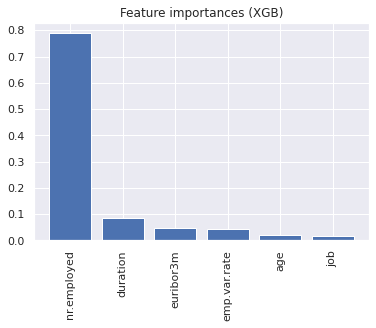

In [ ]:
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

#Showing which features are the most important to 'y' - whether or not the marketing campaign will work
#nr. employed shows it is by far the most important feature

### Unsupervised Machine Learning

In [ ]:
# We select only numerical features from the dataframe
# naming is in anticipation of future clustering
data_to_cluster = data.iloc[:,0:20]

In [ ]:
# import and instantiate scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# learn x-y relationships (principal components) and transform
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [ ]:
# very similar syntax for min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [ ]:
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

In [ ]:
data_to_cluster

age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
0                1       261         1    999         0         1   
1                1       149         1    999         0         1   
2                1       226         1    999         0         1   
3                1       151         1    999         0         1   
4                1       307         1    999         0         1   
...            ...       ...       ...    ...       ...       ...   
41183            0       334         1    999         0         1   
41184            0       383         1    999         0         1   
41185            0       189         2    999         0         1   
41186            0       442         1    999         0         1   
41187            0       239         3    999         1         0   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
41183          -1.1          94.767          -50.8      1.028       4963.6  
41184          -1.1          94.767          -50.8      1.028       4963.6  
41185          -1.1          94.767          -50.8      1.028       4963.6  
41186          -1.1          94.767          -50.8      1.028       4963.6  
41187          -1.1          94.767          -50.8      1.028       4963.6  

[41188 rows x 20 columns]

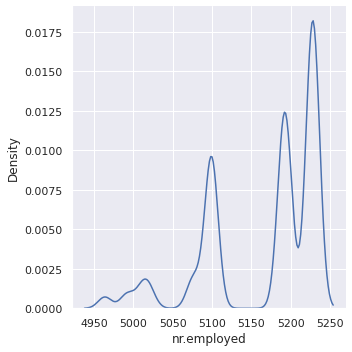

In [ ]:
sns.displot(data=data_to_cluster, 
            x="nr.employed",
            kind="kde")
#pre-scaling

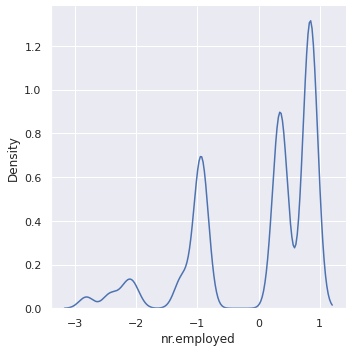

In [ ]:
sns.displot(data=pd.DataFrame(data_to_cluster_scaled, columns=data_to_cluster.columns), 
            x="nr.employed",
            kind="kde")
#post-scaling

In [ ]:
# load up and instantiate PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
# fit-transform the data
data_reduced_pca = pca.fit_transform(data_to_cluster_scaled)

In [ ]:
print(pca.components_) #printing the components

[[-0.017035    0.01299583  0.06098168  0.04654164 -0.13307515  0.04352292
   0.00118269 -0.25886432  0.06415525 -0.01375777  0.0220481  -0.09399702
  -0.1874073   0.28622116 -0.11167644 -0.46163603 -0.36845369 -0.11331944
  -0.46233114 -0.43409783]
 [ 0.20276034  0.03057481 -0.11839311 -0.03937234  0.04889689 -0.06905547
  -0.02214903  0.25126104  0.18466027  0.03822729  0.07018396 -0.04454244
  -0.60787552  0.2526213   0.47489741  0.01588892  0.19753863  0.33457402
   0.01136457 -0.13759682]]


In [ ]:
pca.components_.shape #The shape

(2, 20)

In [ ]:
print(pca.explained_variance_ratio_) #The variance ratio

[0.21347531 0.08422653]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


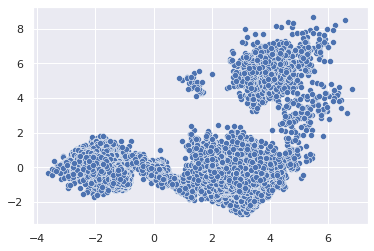

In [ ]:
sns.scatterplot(data_reduced_pca[:,0],data_reduced_pca[:,1]) #scatterplot showing the clustered data

In [ ]:
vis_data = pd.DataFrame(data_reduced_pca)
vis_data['duration'] = data['duration']
vis_data['nr.employed'] = data['nr.employed']
vis_data.columns = ['x', 'y', 'duration', 'nr.employed']


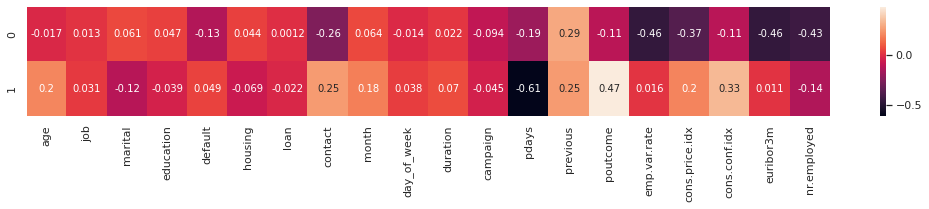

In [ ]:
#Heatmap showing the corelations
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

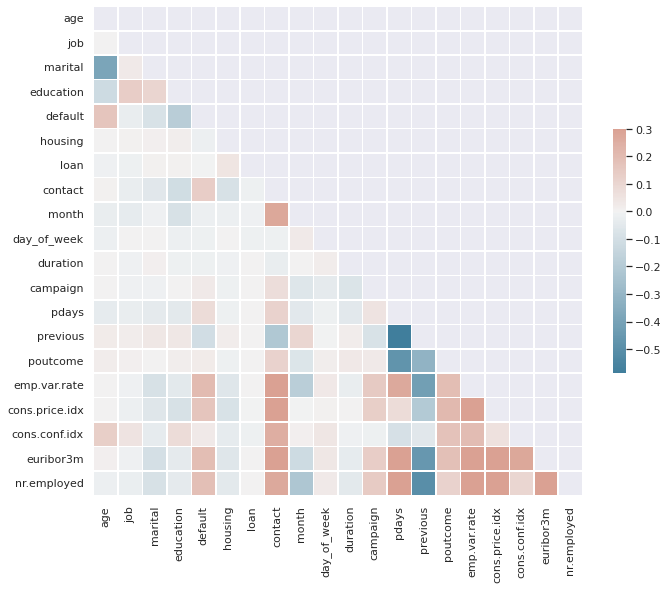

In [ ]:
#quick correlation check

# Compute the correlation matrix
corr = data_to_cluster.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Plot showing the corelations for all of the variables

In [ ]:
from sklearn.datasets import load_digits #Load and return the digits dataset (classification).
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance.
from sklearn.decomposition import NMF #Non-Negative Matrix Factorization (NMF). This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

In [ ]:
!pip install umap-learn -q

In [ ]:
import umap

In [ ]:
# we totally could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [ ]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(data_to_cluster_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


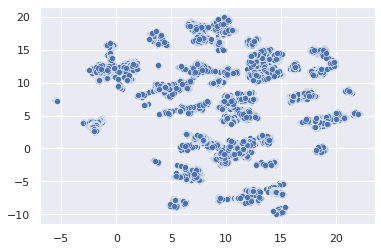

In [ ]:
# just as PCA, umap reduced data can be plottet
sns.scatterplot(embeddings[:,0],embeddings[:,1])

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
#alt.Chart(vis_data).mark_circle(size=60).encode(
#    x='x',
#    y='y',
#    tooltip=['duration', 'nr.employed']
#).interactive()

In [ ]:
from sklearn.cluster import KMeans #K-Means clustering.
clusterer = KMeans(n_clusters=5)

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_to_cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)

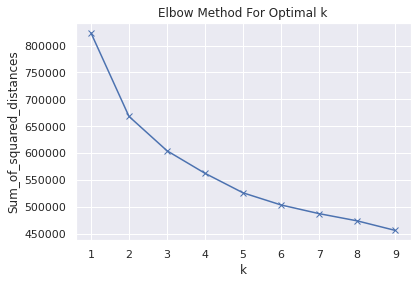

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#Using the elbow method for determining the optimal K

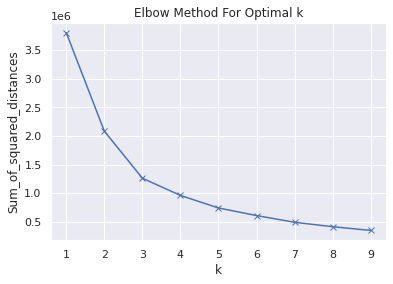

In [ ]:
umap_scaler_km = umap.UMAP(n_components=2)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# back to our k-means instance. We take 3 clusters on non-reduced data
clusterer.fit(data_to_cluster_scaled)

KMeans(n_clusters=5)

In [ ]:
# we can then copy the cluster-numbers into the original file and start exploring
data['cluster'] = clusterer.labels_

In [ ]:
vis_data = pd.DataFrame(embeddings)
vis_data['emp.var.rate'] = data['emp.var.rate']
vis_data['cluster'] = data['cluster']
vis_data['cons.price.idx'] = data['cons.price.idx']
vis_data.columns = ['x', 'y', 'emp.var.rate', 'cluster','cons.price.idx']

In [ ]:
vis_data

x          y  emp.var.rate  cluster  cons.price.idx
0       6.190745   9.245619           1.1        1          93.994
1       7.165607  18.465464           1.1        1          93.994
2      13.242620  13.725793           1.1        1          93.994
3       6.464790   9.278729           1.1        1          93.994
4      18.539228  11.575489           1.1        1          93.994
...          ...        ...           ...      ...             ...
41183   6.439518   2.120903          -1.1        2          94.767
41184   6.355939   2.217272          -1.1        2          94.767
41185   6.437614   2.119351          -1.1        2          94.767
41186   6.370505   2.204832          -1.1        2          94.767
41187  15.123740  -6.900258          -1.1        4          94.767

[41188 rows x 5 columns]

In [ ]:
alt.Chart(vis_data).mark_circle(size=6).encode(
    x='x',
    y='y',
    tooltip=['emp.var.rate', 'cons.price.idx'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2')) #use N after the var to tell altair that it's categorical
).interactive()

alt.Chart(...)

### Extraction of the files


In [ ]:
#import pickle

In [ ]:
#pickle.dump(scaler, open('scaler.pkl','wb'))